In [3]:
%logstop
%logstart -ortq ~/.logs/ML_LinearRegression.py append
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

Logging hadn't been started.


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/magics/logging.py:130: UserWarning: Couldn't start log: [Errno 2] No such file or directory: '/home/codespace/.logs/ML_LinearRegression.py'
  warn("Couldn't start log: %s" % sys.exc_info()[1])


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression and Machine Learning

<!-- requirement: data/gas_consumption.csv -->

The power of quantitative sciences comes from the insight we can derive from mathematical relationships between different measurements. We can use these insights to make predictions about what will happen in the future. The simplest possible relationship between two variables is a linear relationship

$$y_i \approx \beta_0 + \beta_1x_i$$

If we can measure some $(x_i, y_i)$ pairs, we could calculate our _model parameters_ $\beta_0$ and $\beta_1$. Then we could predict $y$ in the future based on $x$, or even try to influence $y$ in the future by controlling $x$.

In [21]:
gas = pd.read_csv('./data/gas_consumption.csv', names=['tax', 'income', 'highway', 'drivers', 'gas'])
gas.head()

,tax,income,highway,drivers,gas
1,9.0,3571,1976,0.525,541
2,9.0,4092,1250,0.572,524
3,9.0,3865,1586,0.580,561
4,7.5,4870,2351,0.529,414
5,8.0,4399,431,0.544,410


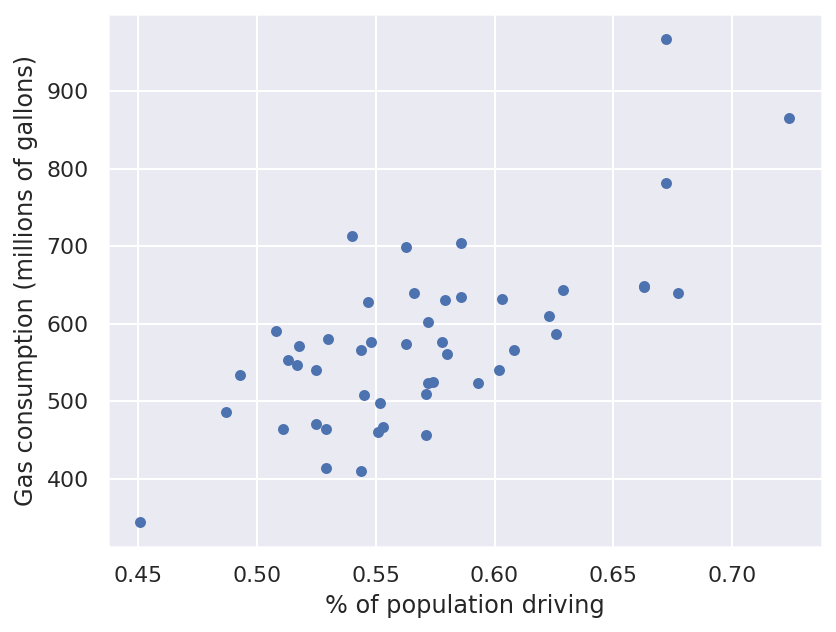

In [22]:
gas.plot(x='drivers', y='gas', kind='scatter')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions of gallons)');

We could try to draw a line describing the trend in the data, but which is the best one?

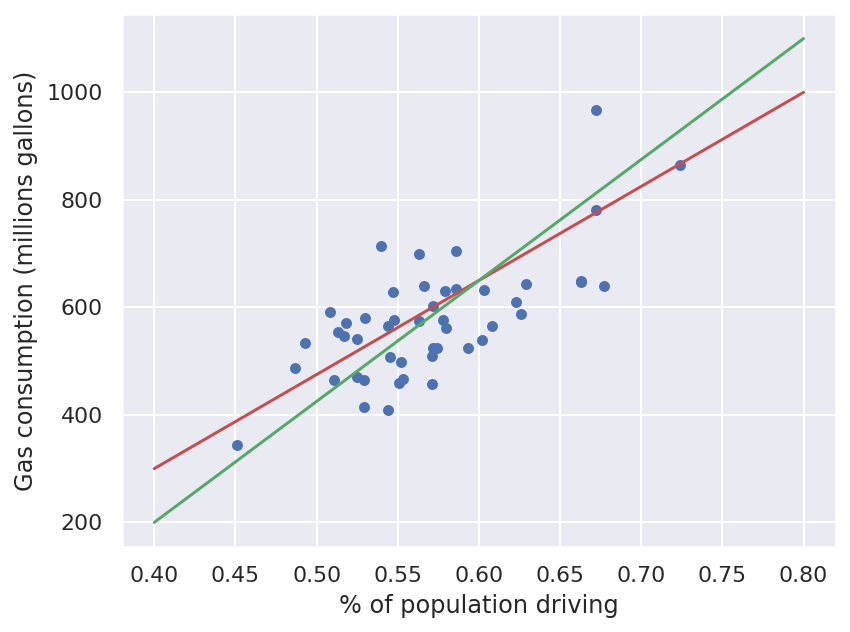

In [23]:
gas.plot(x='drivers', y='gas', kind='scatter')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

plt.plot([.4, .8], [300, 1000], 'r-')
plt.plot([.4, .8], [200, 1100], 'g-');

In order to compare the different trend lines we need to define a **metric** for how well they describe the actual data. The metric should reflect what we value about our trend line. We want our trend line to reliably predict a y-value given an x-value, so it would be reasonable to construct our metric based on the **error** between the trend line and the y-values.

$$ e_i = y_i - (\beta_0 + \beta_1x_i) $$

We want to make the total error as small as possible. Since sometimes the errors will be positive and some will be negative, if we add them together they might cancel out. We don't care if the error is positive or negative, we want the _absolute value_ to be small. Instead of minimizing the total error, we'll minimize the total squared error. Often we divide it by the number of data points, $n$, which is called the **mean squared error** (MSE).

$$ MSE = \frac{1}{n}\sum_i e_i^2 $$

Since $e_i$ depends on our model parameters $\beta_0$ and $\beta_1$, we can tweak our model (the trend line) until the MSE is minimized. In the language of machine learning, the MSE would be called the **cost function** or **loss function**. For different machine learning tasks, we will define different cost functions (or **objective functions/utility functions**, which we seek to maximize instead of minimize).

(50, 1)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


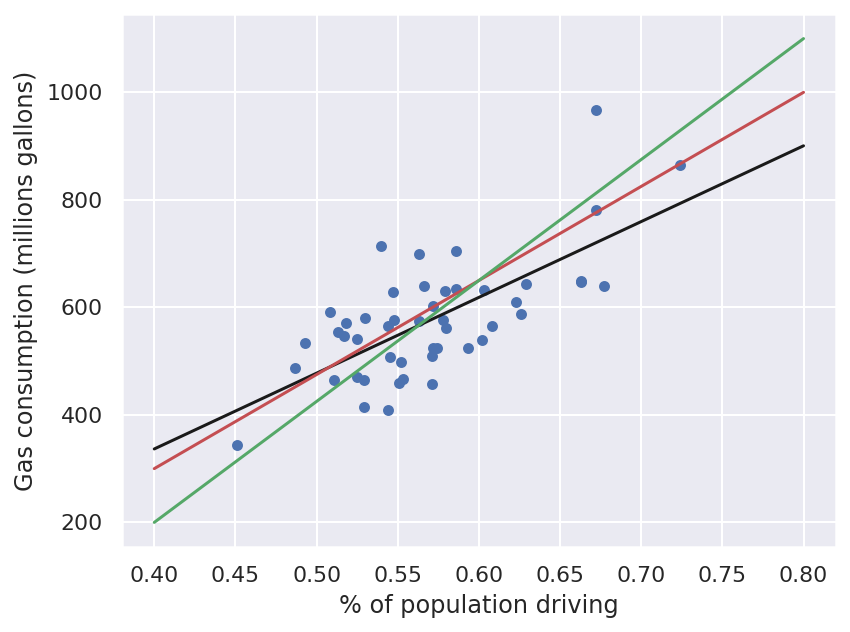

In [24]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object and fit it to the data
linreg = LinearRegression(fit_intercept=True)
linreg.fit(gas[['drivers']], gas['gas'])

# Plot the data
gas.plot(x='drivers', y='gas', kind='scatter')

# Add labels to the x and y axis
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

# Create an x array from .4 to .8
x = np.linspace(.4, .8).reshape(-1, 1)
print(x.shape)

# Plot the predicted values on the chart
plt.plot(x, linreg.predict(x), 'k-')

# Plot the red and green lines
plt.plot([.4, .8], [300, 1000], 'r-')
plt.plot([.4, .8], [200, 1100], 'g-');


In [25]:
# Get the intercept and coefficient of the linear regression model
(intercept, coefficient) = (linreg.intercept_, linreg.coef_[0])
print("Intercept: ", intercept)
print("Coefficient: ", coefficient)


Intercept:  -227.3091174945256
Coefficient:  1409.8421113288002


## Gradient descent

How did we find the model parameters that minimize the cost function? Let's plot the cost function with respect to $\beta_1$ to get an idea.

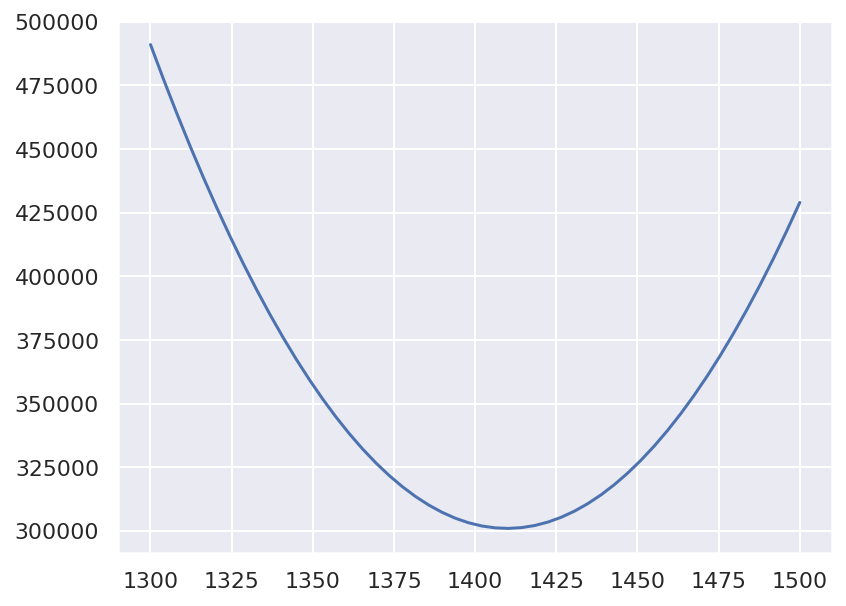

In [26]:
# Get the intercept and initialize an array of values for the coefficient
beta0 = linreg.intercept_
beta1 = np.linspace(1300, 1500)

# Calculate the mean squared error for each value of the coefficient
MSE = [((gas['gas'] - (beta0 + m * gas['drivers']))**2).sum() for m in beta1]

# Plot the MSE against the coefficient
plt.plot(beta1, MSE);


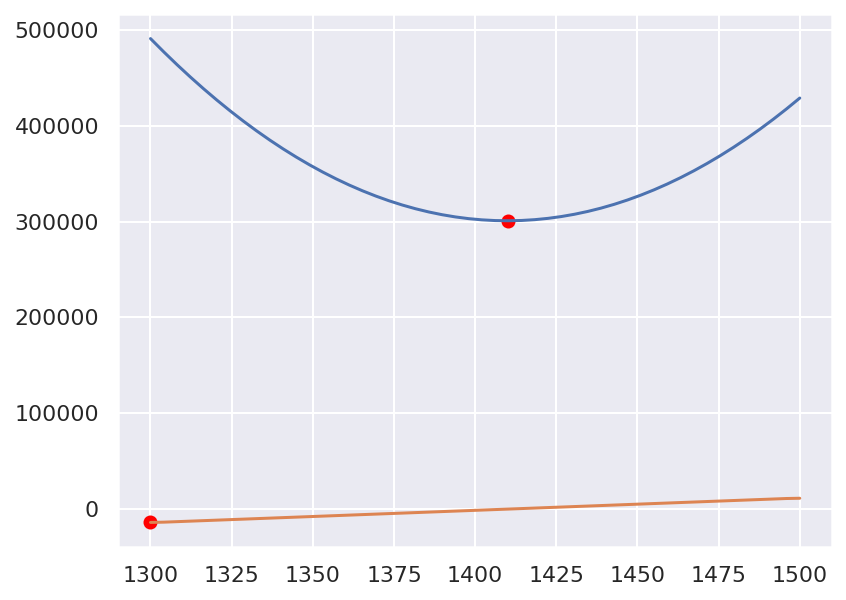

In [27]:
# Find the minimum MSE and its corresponding coefficient
min_MSE = min(MSE)
min_beta1 = beta1[np.argmin(MSE)]

# Calculate the derivative of MSE
dMSE = np.gradient(MSE)

# Find the minimum derivative of MSE and its corresponding coefficient
min_dMSE = min(dMSE)
min_dBeta1 = beta1[np.argmin(dMSE)]

# Plot the MSE against the coefficient with the minimum MSE highlighted
plt.plot(beta1, MSE)
plt.scatter(min_beta1, min_MSE, color='red')

# Plot the derivative of MSE against the coefficient with the minimum derivative of MSE highlighted
plt.plot(beta1, dMSE)
plt.scatter(min_dBeta1, min_dMSE, color='red')



If we started with some initial guess $\beta_1 = 1300$, we could simply follow the slope of the MSE downhill with respect to $\beta_1$. We could calculate the MSE around 1300 to work out which way is downhill, and then update $\beta_1$ in that direction. With each step we move closer and closer to the bottom of the valley at 1409.

This method of always going downhill from where we are is called **gradient descent**. In general the loss function could be very complicated and we won't be able to solve where the minimum is directly. Gradient descent gives us an algorithm for finding our way to the minimum when we don't know where it is in advance.

For example, the `HuberRegressor` also optimizes a linear model, but [uses a more complicated loss function](http://scikit-learn.org/stable/modules/linear_model.html#huber-regression). The Huber loss is less influenced by outliers than the MSE.

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but HuberRegressor was fitted with feature names
  warnings.warn(


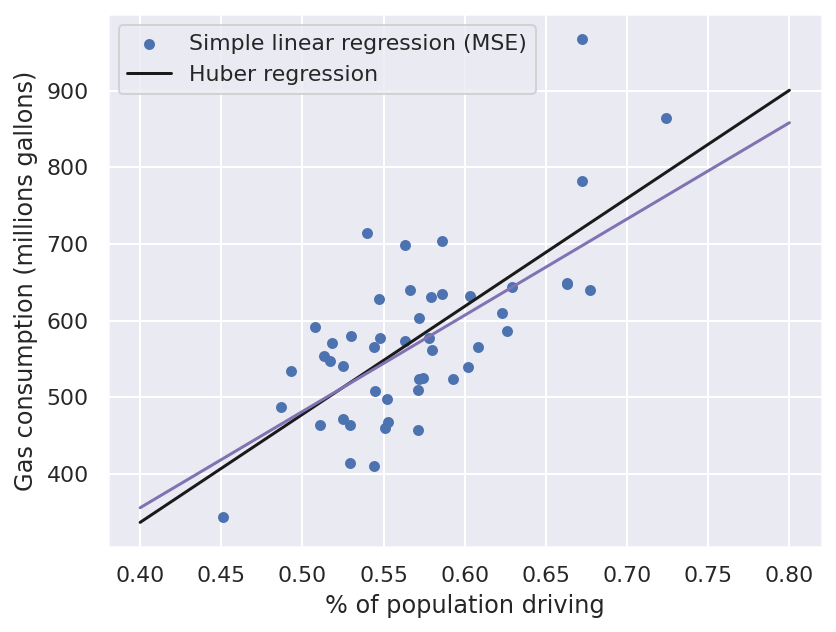

In [28]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(fit_intercept=True, alpha=0)
huber.fit(gas[['drivers']], gas['gas'])
gas.plot(x='drivers', y='gas', kind='scatter')
plt.xlabel('% of population driving')
plt.ylabel('Gas consumption (millions gallons)')

x = np.linspace(.4, .8).reshape(-1, 1)
plt.plot(x, linreg.predict(x), 'k-')
plt.plot(x, huber.predict(x), 'm-')
plt.legend(['Simple linear regression (MSE)', 'Huber regression']);

## Multivariate regression

Looking again at our DataFrame, we see we have other variables we could use to predict gas consumption.

In [29]:
#!pip install ipywidgets

In [30]:
from ipywidgets import widgets

feature_desc = {'tax': 'Gas tax', 'drivers': '% of population driving', 'income': 'Average income (USD)', 'highway': 'Miles of paved highway'}
def plot_feature(column):
    plt.plot(gas[column], gas['gas'], '.')
    plt.xlabel(feature_desc[column])
    plt.ylabel('Gas consumption (millions gallons)')

dropdown_menu = {v: k for k, v in feature_desc.items()}

widgets.interact(plot_feature, column=dropdown_menu);

interactive(children=(Dropdown(description='column', options={'Gas tax': 'tax', '% of population driving': 'dr…

To use all of these predictors (called **features**), we will need to fit a slightly more complicated function

$$ y_i \approx \beta_0 + \beta_1x_{1i} + \beta_2x_{2i} + \beta_3x_{3i} + \beta_4x_{4i} $$

or more generally

$$ y_i \approx  \sum_j\beta_jX_{ij} $$

where $i$ labels different **observations** and $j$ labels different **features**. When we have one feature, we solve for a line; when we have two features, we solve for a plane; and so on, even if we can't imagine higher dimensional spaces.

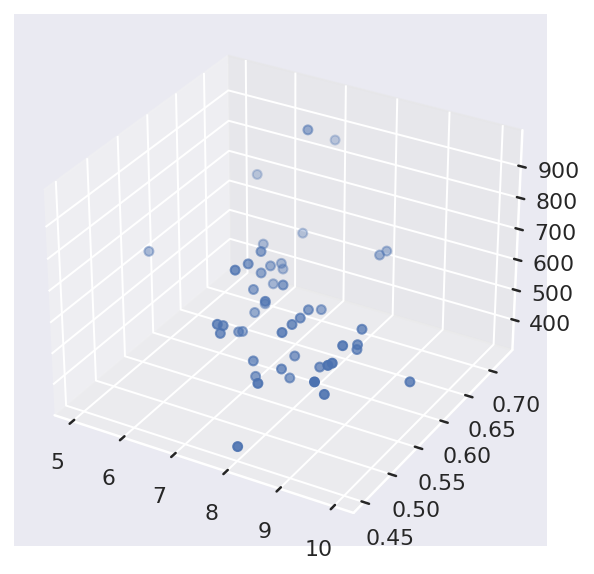

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gas['tax'], gas['drivers'], gas['gas'])

In [35]:
linreg.fit(gas[['tax', 'drivers']], gas['gas'])

LinearRegression()

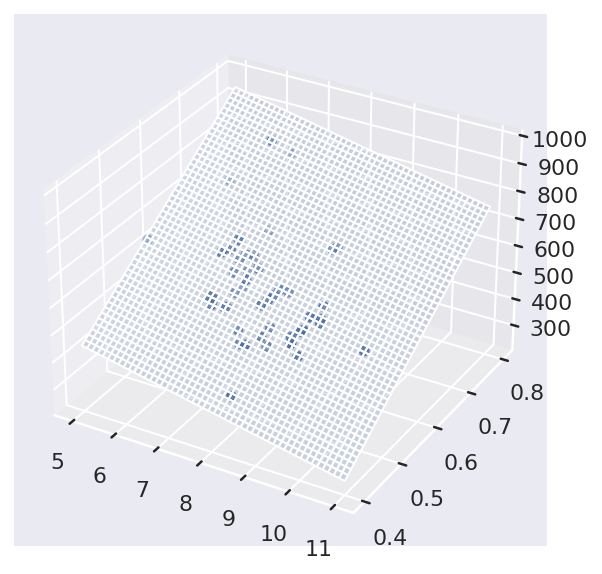

In [36]:
from mpl_toolkits.mplot3d import Axes3D

plt3d = plt.figure().add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(5, 11), np.linspace(.4, .8))
z = linreg.intercept_ + linreg.coef_[0] * xx + linreg.coef_[1] * yy
plt3d.plot_surface(xx, yy, z, alpha=0.2)
plt3d.scatter(gas['tax'], gas['drivers'], gas['gas'])


In [34]:
from ipywidgets import interact
import numpy as np

def plot_cross(tax=5):
    x = np.linspace(.4, .8)
    plt.plot(x, linreg.intercept_ + linreg.coef_[0]*tax + linreg.coef_[1]*x)
    alpha = 1 - abs(gas['tax'] - tax) / abs(gas['tax'] - tax).max()
    colors = np.zeros((len(gas), 4))
    colors[:, 3] = alpha
    plt.scatter(gas['drivers'], gas['gas'], color=colors)

interact(plot_cross, tax=(5,11,1));

interactive(children=(IntSlider(value=5, description='tax', max=11, min=5), Output()), _dom_classes=('widget-i…

*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*